# 자료의 분포

In [3]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,928 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and dire

In [4]:
import pandas as pd

In [27]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.2 MB/s eta 0:00:00


In [5]:
# 그림 그리기를 위한 코드와 한글 실행
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (8,8)   # 그림 크기 조정

이번 시간은 데이터를 분석할 때 자료의 기본적인 특성을 파악하는 일에 대하여 배워보자. 데이터가 가지는 값의 형태와 종류를 파악하고 자료가 전체적으로 어떻게 구성되어 있는지 파악하는 것이 데이터 분석의 첫단계이다.

자료가 어떤 곳에 얼마나 집중되어 있는지, 데이터가 퍼진 정도는 얼마나 되는지를 나타내는 것이 **분포(distribution)** 이다. 좋은 분석을 하기 위해서는 데이터의 분포를 잘 이해하는 것이 중요하다. 자료가 집중되고 퍼져있는 특성에 따라서 분석의 방향이 달라질 수 있고 유용한 결과를 얻을 수 있다.      


## 체력측정 자료

이제 우리는 여러 운동센터에서 측정된 사람들의 체력측정 데이터를 가지고 자료의 분포를 파악하는 방법을 배워보자.

아래 자료는 전국의 체력인증센터에서 관리하고 있는 국민체력측정데이터의 항목별 측정 자료를 정리한 것이다. 국민체력측정데이터는 국민체육진흥공단에서 실시하는 [국민체력100](https://nfa.kspo.or.kr/front/certify/cer0103_list.do)사업으로 얻어진 자료로서 전국의 체력인증센터에 방문한 사람들의 연령, 신장, 체중, 윗몸일으키기, BMI, 등의 체력 측정 항목별 결과를 지닌 자료이다. 체력측정 자료는 [문화빅데이터플랫폼](https://www.culture.go.kr/bigdata/user/main.do)에서 받아볼 수 있다.

체력측정데이터를 데이터프레임 `physical_data` 로 불러오자.

In [6]:
url = "https://uos-bigdata.github.io/bigdata-exercise/_downloads/f143e9ca867a19f030d7b067add010d1/physical_test_2018_data.csv"
physical_data = pd.read_csv(url, sep=',', encoding = 'utf-8-sig')

In [9]:
physical_data.shape

(1874, 18)

In [7]:
physical_data.head(10)

,CENTER_NM,CERT_GBN,AGE_GBN,TEST_AGE,TEST_SEX,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F012,ITEM_F018,ITEM_F019,ITEM_F022,ITEM_F028
0,연제,참가증,성인,33,M,159.2,57.2,30.3,77.0,60.0,101.0,23.3,30.6,-6.2,22.6,27.0,186.0,53.5
1,연제,참가증,성인,48,F,155.8,52.9,29.0,70.0,80.0,130.0,27.5,30.7,8.8,21.8,18.0,149.0,58.0
2,세종,참가증,성인,22,M,175.2,96.2,32.8,109.4,85.0,141.0,48.9,52.3,-2.8,31.3,40.0,212.0,54.4
3,연제,2등급,성인,29,M,178.7,79.4,17.9,80.0,84.0,132.0,44.8,45.9,10.4,24.9,48.0,230.0,57.8
4,사하,참가증,성인,31,F,160.1,50.2,31.2,NaN,71.0,115.0,13.4,16.8,15.9,19.6,27.0,133.0,33.5
5,KSPO광주,참가증,성인,23,F,157.8,60.1,42.4,72.0,63.0,103.0,19.8,22.4,24.1,24.1,4.0,NaN,37.3
6,영암,참가증,유소년,11,M,165.5,60.3,NaN,79.0,64.0,114.0,18.6,18.7,9.5,22.0,NaN,122.0,31.0
7,청주,참가증,성인,24,M,174.9,74.5,35.7,96.1,77.0,132.0,41.5,46.5,6.7,24.4,30.0,204.0,62.4
8,구미,참가증,청소년,18,M,181.0,71.3,19.1,NaN,79.0,117.0,45.5,41.5,6.9,21.8,NaN,NaN,63.8
9,춘천,참가증,성인,41,F,160.6,72.7,38.9,96.8,80.0,110.0,29.7,29.9,7.5,28.2,15.0,135.0,41.1


체력측정 데이터는 2021년 8월에 얻어진 자료로서 1874 명의 사람들의 자료로 구성되어 있으며 18개의 컬럼으로 구성된다.

In [10]:
physical_data.shape

(1874, 18)

위에서 받은 국민체력측정데이터의 각 컬럼에 대한 설명도 다음과 같이 데이터프레임 `phisical_name` 으로 불러오자. 데이터프레임 `phisical_name` 은 위에서 얻은 국민체력 자료의 각 컬럼의 이름에 대한 설명이다.

In [12]:
url2 = "https://uos-bigdata.github.io/bigdata-exercise/_downloads/f143e9ca867a19f030d7b067add010d1/physical_test_2018_data.csv"
physical_names = pd.read_csv(url2, sep=',', encoding = 'utf-8-sig')

In [13]:
physical_names.head(15)

,CENTER_NM,CERT_GBN,AGE_GBN,TEST_AGE,TEST_SEX,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F012,ITEM_F018,ITEM_F019,ITEM_F022,ITEM_F028
0,연제,참가증,성인,33,M,159.2,57.2,30.3,77.0,60.0,101.0,23.3,30.6,-6.2,22.6,27.0,186.0,53.5
1,연제,참가증,성인,48,F,155.8,52.9,29.0,70.0,80.0,130.0,27.5,30.7,8.8,21.8,18.0,149.0,58.0
2,세종,참가증,성인,22,M,175.2,96.2,32.8,109.4,85.0,141.0,48.9,52.3,-2.8,31.3,40.0,212.0,54.4
3,연제,2등급,성인,29,M,178.7,79.4,17.9,80.0,84.0,132.0,44.8,45.9,10.4,24.9,48.0,230.0,57.8
4,사하,참가증,성인,31,F,160.1,50.2,31.2,NaN,71.0,115.0,13.4,16.8,15.9,19.6,27.0,133.0,33.5
5,KSPO광주,참가증,성인,23,F,157.8,60.1,42.4,72.0,63.0,103.0,19.8,22.4,24.1,24.1,4.0,NaN,37.3
6,영암,참가증,유소년,11,M,165.5,60.3,NaN,79.0,64.0,114.0,18.6,18.7,9.5,22.0,NaN,122.0,31.0
7,청주,참가증,성인,24,M,174.9,74.5,35.7,96.1,77.0,132.0,41.5,46.5,6.7,24.4,30.0,204.0,62.4
8,구미,참가증,청소년,18,M,181.0,71.3,19.1,NaN,79.0,117.0,45.5,41.5,6.9,21.8,NaN,NaN,63.8
9,춘천,참가증,성인,41,F,160.6,72.7,38.9,96.8,80.0,110.0,29.7,29.9,7.5,28.2,15.0,135.0,41.1


## 자료의 종류

우리가 다루는 자료는 데이터가 지닌 값의 특성에 따라서 보통 **범주형 변수(categorical data)** 와 **수치형 변수(continuous variable)** 로 구분한다.

범주형변수의 특성은 다음과 같다.

- 가질 수 있는 값의 정해진 항목들 중의 하나이다 (예를 들어서 성별, 지역 등)
- 자료의 값을 입력할 때 항목별로 정해진 문자나 숫자로 입력한다
- 예를 들어 남자는 1 또는 `M`, 여자는 0 또는 `F` 등으로 자료에 나타난다.
- 범주형 자료는 숫자로 입력되어 있어도 실제 숫자가 아니라 항목을 나타내는 것이다.

연속형 변수는 말 그대로 숫자로 표시되는 데이터를 말한다. 숫자는 일어난 횟수처럼 정수이가나 또는 몸무게처럼 실수로 표시된다.

연령과 같은 자료는 실제로 많은 정수로 표시되어 있다. 그럼 연령은 범주형 자료인가 아니면 연속형 자료인가? 이러한 질문은 분석의 목적에 따라서 달라질 수 있다. 연령을 시간의 개념으로 보고 분석을 할 떄는 연속형 변수로 볼 수 있다. 또한 연령별로 특정한 분석이 필요한 경우 범주형으로 볼 수 있다.

즉, 우리가 다루는 데이터는 많은 경우 범주형과 연속형으로 구별할  수 있지만 같은 데이터가 범주형과 연속형의 특성을 모두 가진 경우도 있다.   

데이터에서 자료의 형식은 다음과 같이`dtypes` 메소드로 파악할 수 있다.

자료를 처음 데이터프레임으로 입력하면 숫자는 형태에 따라서 숫자의 형식 `int` 나 `float64` 으로 저장되며 문자는 `object` 로 인식된다.


In [14]:
physical_data.dtypes

,0
CENTER_NM,object
CERT_GBN,object
AGE_GBN,object
TEST_AGE,int64
TEST_SEX,object
ITEM_F001,float64
ITEM_F002,float64
ITEM_F003,float64
ITEM_F004,float64
ITEM_F005,float64



범주형 자료는 데이터프레임에서 자료 형식을 **`categorical`** 로 만들어 주는 것이 좋다.

범주형 자료만 아래와 같이 선택하여 메소드 `.astype("category")` 를 적용하고 다시 데이터프레임에 저장한다.

범주형 자료는 데이터프레임의 범주형 형식 **`categorical`** 으로  지정을 해야 범주형 자료에 적용되는 다양한 메소드들을 적절하게 이용할 수 있다. 또한 숫자로 표시된 범주형 자료가 연속형 자료로 인식되어 예상하지 못한 결과가 나오는 것을 피할 수 있다.   

In [22]:
physical_data["CENTER_NM"]  = physical_data["CENTER_NM"].astype("category")
physical_data["CERT_GBN"]  = physical_data["CERT_GBN"].astype("category")
physical_data["AGE_GBN"]  = physical_data["AGE_GBN"].astype("category")
physical_data["TEST_SEX" ]  = physical_data["TEST_SEX"].astype("category")
# .loc 없애야 타입 바뀜(objext -> category): 중간고사 시험 ***********************

In [21]:
physical_data[["CENTER_NM","CERT_GBN","AGE_GBN","TEST_SEX" ]].dtypes

,0
CENTER_NM,category
CERT_GBN,category
AGE_GBN,category
TEST_SEX,category


## 범주형자료의 분포

이제 체력측정 데이터에서 남자와 여자의 비율은 얼마나 될까?

다음과 같은 성별을 나타내는 변수 `TEST_SEX`에 남,여의 숫자를 알아보자. 컬럼을 선택하고 메소드  `value_counts()` 를 적용한다. 범주형 변수의 항목별 숫자를 돗수(frequncy)라고 하며 다음의 결과를 돗수 분포표(frequency table)라고 말한다.  

In [23]:
physical_data["TEST_SEX"].value_counts()

,count
TEST_SEX,
M,1081
F,793


이제 돗수 분포표에서 구한 남여의 구성 인원수를 파이 차트(pie chart)로 다음과 같이 나타낼 수 있다.

메소드 `plot.pie()` 를 사용하면 된다.

<Axes: ylabel='count'>

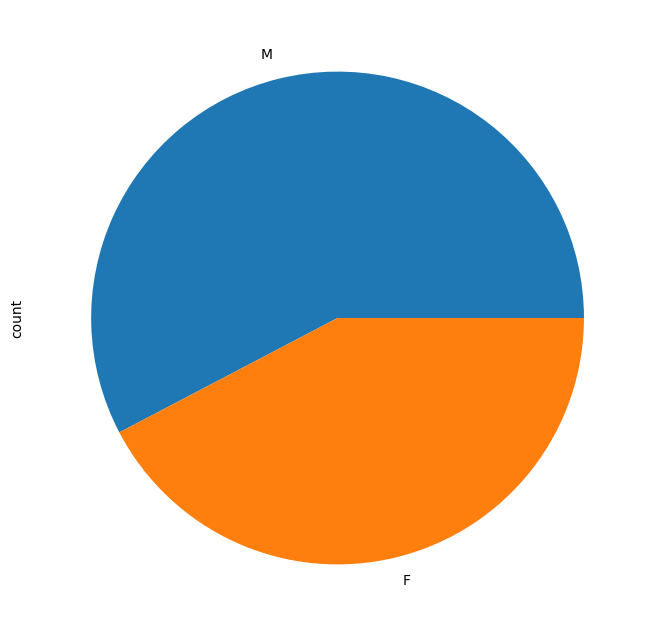

In [24]:
physical_data["TEST_SEX"].value_counts().plot.pie()

 돗수 분포표를 구할 때 돗수가 아닌 항목의 비율로 계산하고 싶은 경우가 있다. 이런 경우  `value_counts(normalize=True)` 를 사용하면 된다.

In [25]:
physical_data["TEST_SEX"].value_counts(normalize=True)
#noramlize=True: 상대도수

,proportion
TEST_SEX,
M,0.576841
F,0.423159


연령대별로 구분한 컬럼 `AGE_GBN` 을 이용하여 연령대별 분포도 살펴보자.

<Axes: ylabel='count'>

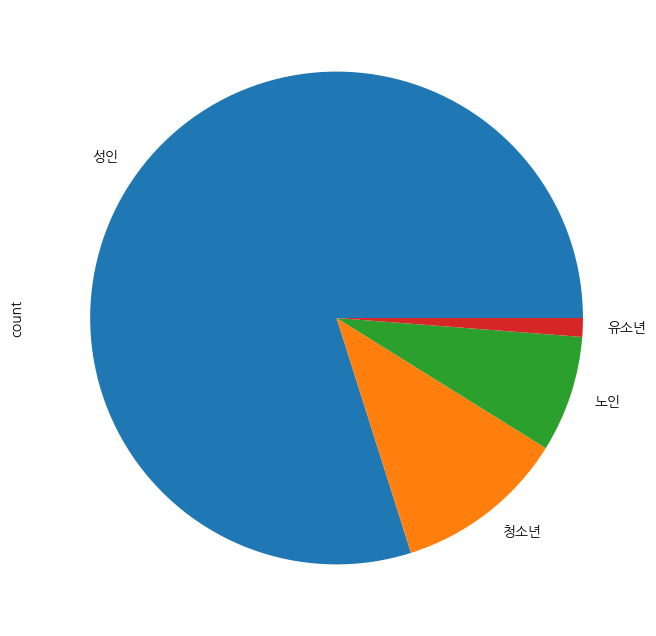

In [28]:
physical_data["AGE_GBN"].value_counts().plot.pie()

돗수의 크기를 막대로 표시하는 바차트(bar chart)는 다음과 같이 그린다. 막대기의 크기를 비율로 지정해보자  

<Axes: xlabel='AGE_GBN'>

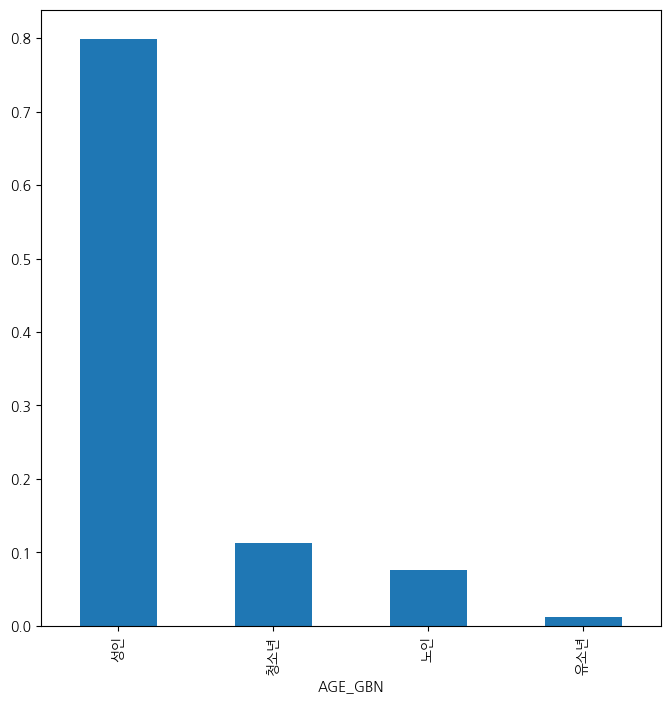

In [29]:
physical_data["AGE_GBN"].value_counts(normalize=True).plot.bar()

두 개의 범주형 변수를 고려하고 각 항목들의 조합에 대한 분포표가 분할표(contingency table) 이다. 성별과 연령대별 분할표는 다음과 같이 구할 수 있다.   

In [30]:
physical_data[ ["TEST_SEX", "AGE_GBN"]].value_counts()

TEST_SEX  AGE_GBN
M         성인         865
F         성인         632
M         청소년        145
F         노인          88
          청소년         66
M         노인          55
          유소년         16
F         유소년          7
Name: count, dtype: int64

<Axes: ylabel='count'>

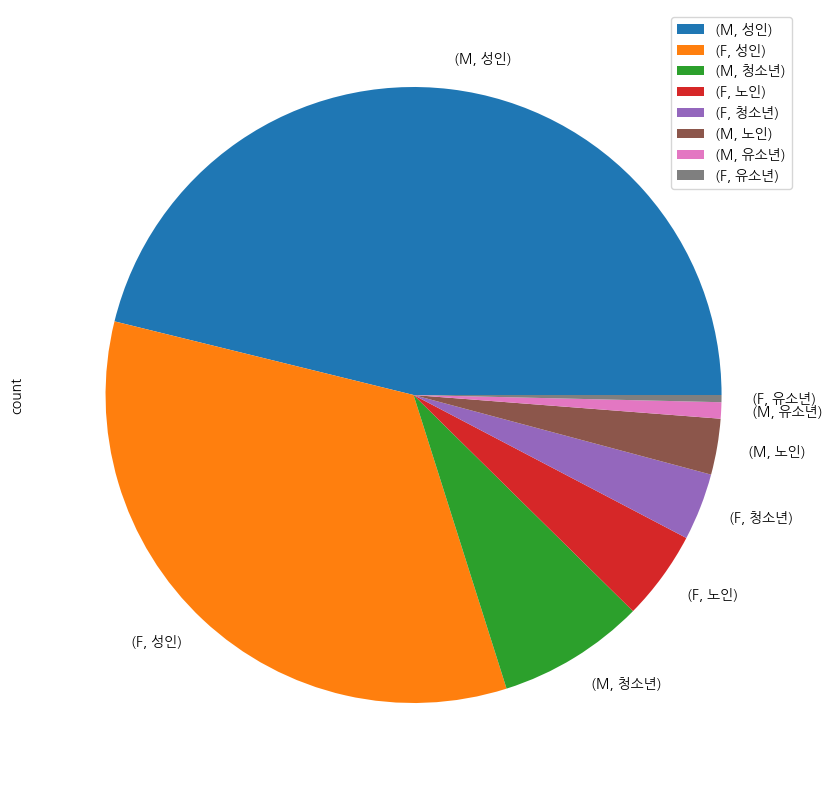

In [32]:
physical_data[ ["TEST_SEX", "AGE_GBN"]].value_counts().plot.pie(figsize=(15,10), legend = True)

## 수치형 자료의 분포

### 히스토그램

이제 체력측정 자료에서 나타나는 여러 변수를 이용하여 연속형 자료의 분포에 대하여 알아보는 방법에 대해 살펴보자.

먼저 사람들이 가장 관심이 많은 몸무게('ITEM_F002`)의 분포에 대하여 알아보자.

먼저 히스토그램은 전체 자료를 구간으로 나누어 구간에 속한 자료의 돗수를 그림으로 나타낸다. 메소드 `plot.hist()` 를 적용하며 사용할 열이름을 `y='ITEM_F002'` 로 지정해 준다.

<Axes: ylabel='Frequency'>

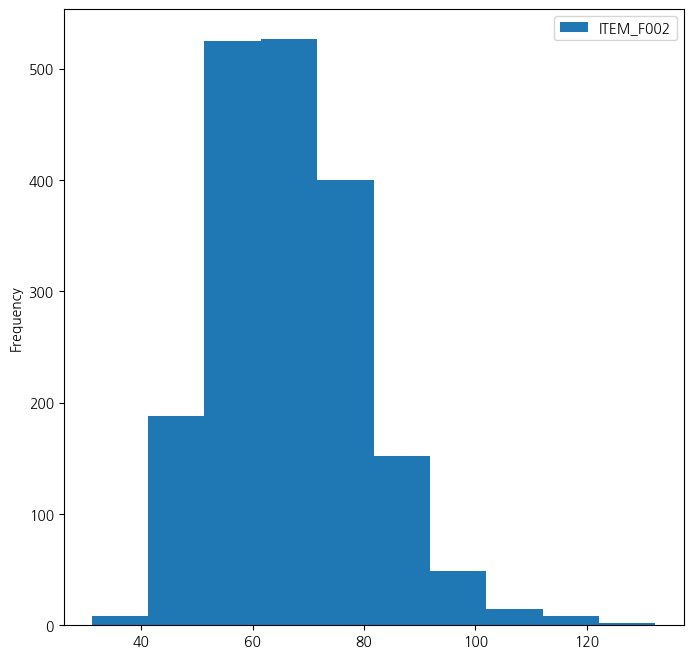

In [33]:
physical_data.plot.hist(y='ITEM_F002')

히스토그램의 구간의 개수는  `bins=` 선택문으로 바꿀 수 있다.

<Axes: ylabel='Frequency'>

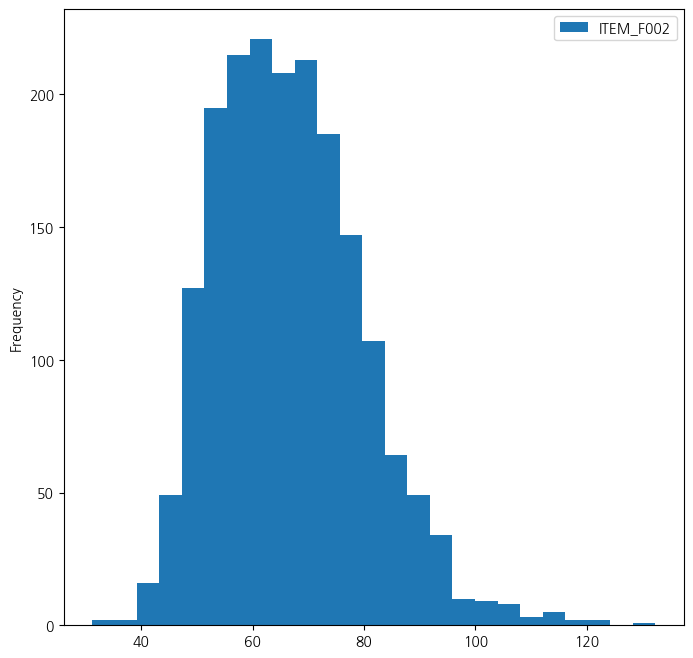

In [34]:
physical_data.plot.hist(y='ITEM_F002', bins=25)

신장(키)의 분포도 알아보자.

<Axes: ylabel='Frequency'>

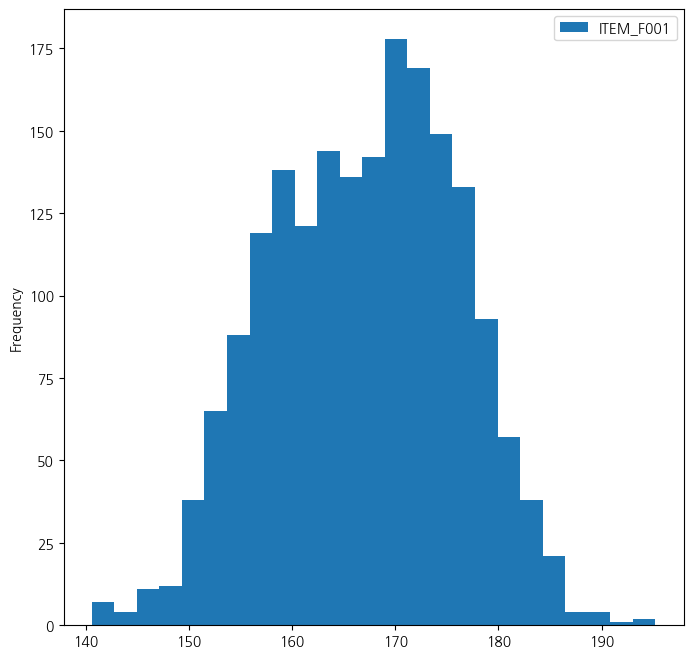

In [35]:
physical_data.plot.hist(y='ITEM_F001', bins=25)

위의 그림에서 보있듯이 몸무게의 분포는 오른쪽으로 치우친 경향(왜도>0, 오른쪽으로 꼬리가 길다)이 나타난다. 자료가 가장 집중된 중심의 위치에서 좌우 대칭으로 나타나지 않고 몸무게가 큰 방향으로 약간 치우쳐있다.

키의 분포는 중심에서 죄우로 대칭인 모양으로 나타난다.

일반적으로 몸무게와 키는 중심에서 좌, 우로 거의 대칭인 분포를 가진다. 위에서 우리가 다룬 자료는 우리나라 사람 전체를 대표하는 자료가 아니다. 이 자료는 체력인증센터를 방문하는 사람들만으로 구성된 자료이다. 따라서 체력인증센터를 방문하는 사람들이 특정한 경향을 가지고 있다면 자료의 분포는 우리나라 사람 전체의 분포와 다를 수 있다.

- 체력인증센터를 방문하는 사람들이 전체 사람들과 다른 특성이 있다면 무었일까?

데이터를 수집하고 분석할 때 자료가 가지고 있는 특성을 파악하는 것은 매우 중요하다. **자료가 전체 집단을 대표할 수 있도록 수집된 자료인지**, 또는 어떤 특정한 경향이나 성질을 가진 개체들의 자료인지 파악하는 것이 중요하며 이는 데이터 분석에서 얻은 결론을 일반화하여 적용하는데 큰 영향을 미친다.   



### 상자그림

자료의 분포를 파악하는데 가장 유용하고 단순함 그림은 **상자그림(box plot)** 이다.


일단 자료를 순서대로 정렬해 놓았을 때 자료의 중심과 퍼진 정도를 나타내는 중요한 통계량은 다음과 같다.

- 자료의 위치

  + **1사분위수** (25%백분위수, Q1): 자료를 순서대로 정렬했을 때 아래에서 25%에 있는 수
  + **중앙값** (median, Q2): 자료를 순서대로 중앙에 있는 수
  + **3사분위수** (75%백분위수, Q3): 자료를 순서대로 정렬했을 때 아래에서 75%에 있는 수

- 자료의 퍼진 정도

  + **IQR** (Inter Quantile Range): IQR= Q3-Q1

IQR 은 중심 부근에 위치하는 전체 자료의 50%의 범위를 나타내는 측도로서 자료의 퍼진 정도를 나타내는 대표적인 측도이다.  

상자그림은 자료를 순서대로 정렬했을 때 25% 와 75% 의 위치에 있는 자료를 각각 상자의 아래면과 윗면으로 그려주고 중앙값(mdedian, 50%)을 상자 안에 표시해준다.

또한 자료가 작은 쪽과 큰 쪽으로 퍼진 정도를 상자에서 나온 선으로 표시해준다. 자료의 퍼진 정도를 나타내는 선의 위치는 상자의 끝에서 (1.5)IQR에 있는 곳을 나타낸다.

- 위 선 끝점: Q3 + (1.5)IQR
- 상자 위  : 75% 백분위수 (3사분위수, Q3)
- 상자 중앙: 중앙값(median)
- 상자 아래: 25% 백분위수 (1사분위수, Q1)
- 아래 선 끝점: Q1 - (1.5)IQR

또한 자료의 중심에서 매우 먼 자료들, 즉 (1.5)IQR 을 벗어난 자료는 점으로 표시해 준다.


체려측정자료에서 몸무게를 상자 그림으로 그려보면 몸무게의 값이 큰 방향으로 치우친 경향을 더 확실하게 볼 수 있다.  

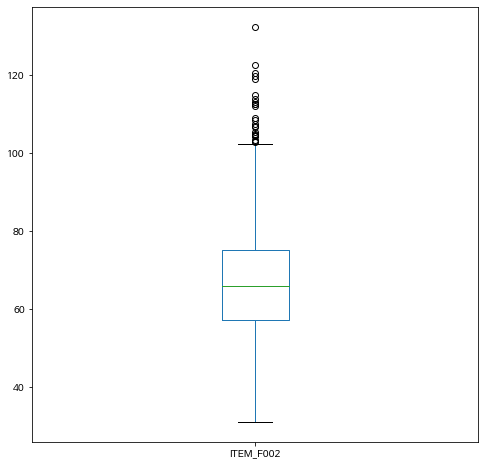

In [ ]:
physical_data.plot.box(y='ITEM_F002')

그럼 몸무게와 키에 대한 상자그림을 나란히 그려보자. 두 개의 그림을 각각 좌우로 그릴 경우 `subplots=True` 선택문을 사용한다.

몸무게와 키의 상자그림을 비교하면 몸무게는 비대칭인 분포이고, 반면 키는 거의 대칭인 분포를 보이고 있다.

ITEM_F001       AxesSubplot(0.125,0.125;0.352273x0.755)
ITEM_F002    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

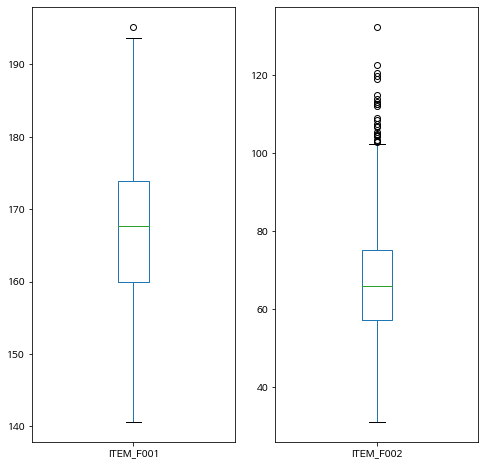

In [ ]:
physical_data.plot.box(y=['ITEM_F001', 'ITEM_F002'], subplots=True)

### 산점도

마지막으로 키와 몸무게의 관계는 어떨까?

두 연속형 변수의 값들을 2차원 평면에 나타내는 그림을 산점도(scatter plot)이라고 한다. 산점도는 메소드 `plot.scatter(x=, y=)`으로 그릴 수 있다.

산점도에서 점들의 투명도는 `alpha=0.5` 로 저정할 수 있다.


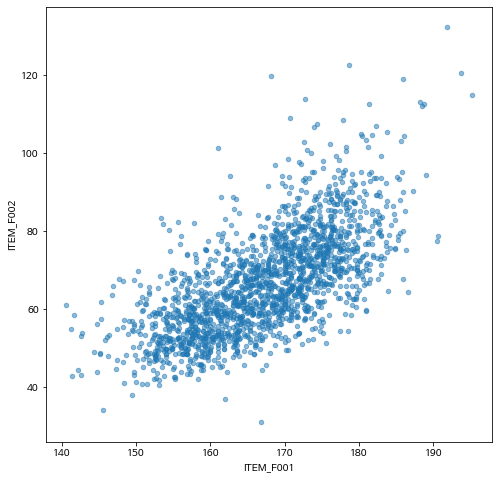

In [ ]:
physical_data.plot.scatter(x='ITEM_F001',y= 'ITEM_F002', alpha=0.5)


키와 몸무게의 관계를 성별로 구분하여 그려보자.

TEST_SEX
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

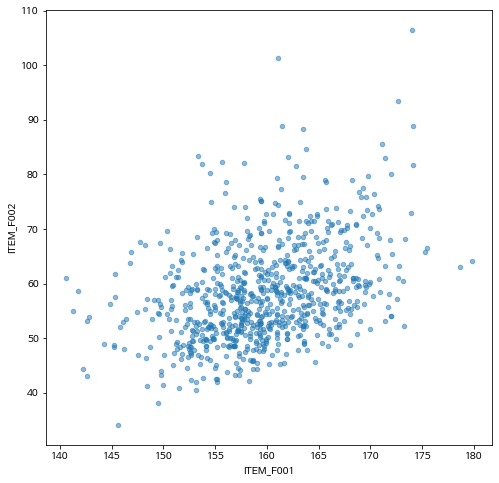

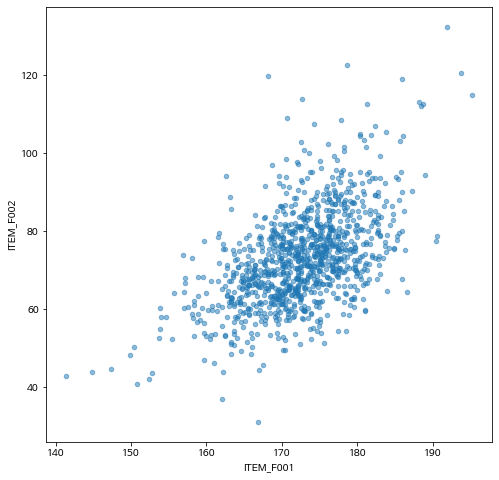

In [ ]:
physical_data.groupby(['TEST_SEX']).plot.scatter(x='ITEM_F001',y= 'ITEM_F002', alpha=0.5)


참고로 정교한 그림을 그리는데 사용할 수 있는 라이브러리 중 `seaborn` 라이브러리는 `R`의 `ggplot2` 와 같은 예쁜 그림을 그려준다.

 다음은 `seaborn` 라이브러리를 `sns` 로 입력하고 산점도를 그리는 예이다. `seaborn` 라이브러리의 자세하 사용법은 라이브러리 [매뉴얼](https://seaborn.pydata.org/index.html)을 참조하자.



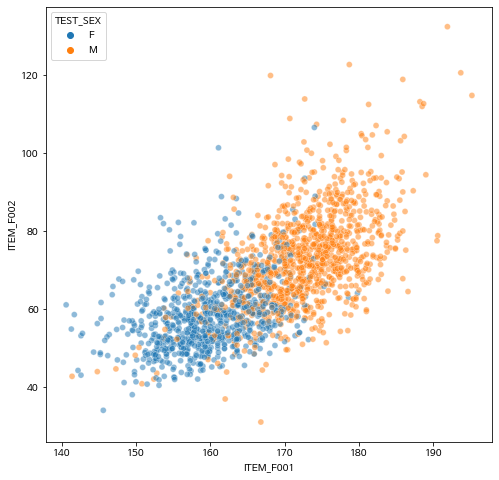

In [ ]:
import seaborn as sns

sns.scatterplot(data=physical_data, x='ITEM_F001',y= 'ITEM_F002', hue='TEST_SEX', alpha=0.5)


## 참고: 그룹별 분포

아래 그림들은 `pandas` 라이브러리의 `plot` 메소드로 그리기 힘든 그룹별로 분포에 대한 그림을 그리는 방법이다.

seaborn 라이브러리의 특별한 함수를 이용하며 정확한 코드는 강의의 범위에 벗어나지만 분포의 비교에 대한 설명을 하기 위하여 파이썬 코드와 결과를 수록했다.  

연령집단의 분포를 성별로 그린 바차트

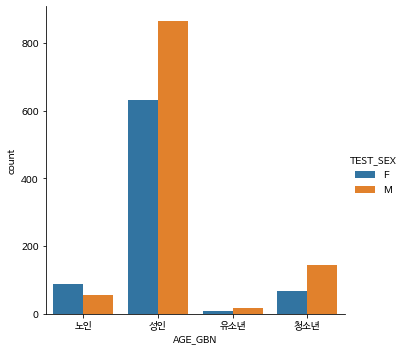

In [ ]:
sns.catplot(data=physical_data, x="AGE_GBN",  hue="TEST_SEX", kind="count")

성별로 몸무게의 분포를 비교하는 히스토그램

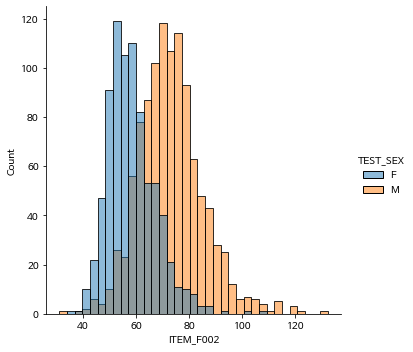

In [ ]:
sns.displot(data=physical_data, x="ITEM_F002", hue="TEST_SEX")

성별로 몸무게의 분포를 비교하는 상자그림

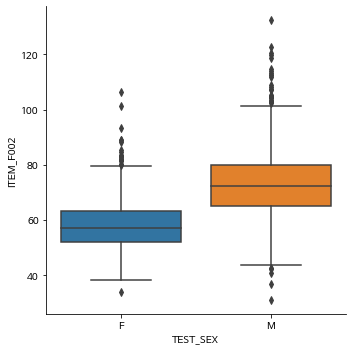

In [ ]:
sns.catplot(data=physical_data, x='TEST_SEX',y= 'ITEM_F002', kind="box" )